# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Scale the input features
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' and 'seaborn' for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import 'MinMaxScaler' from 'sklearn'
from sklearn.preprocessing import MinMaxScaler

# Import 'train_test_split' from 'sklearn'
from sklearn.model_selection import train_test_split

# Import 'LogisticRegression' and 'LogisticRegressionCV' from 'sklearn'
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Import various suitable classification performance metrics from 'sklearn'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, precision_recall_curve, f1_score

In [3]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
churndata = pd.read_csv('churndata.csv', index_col = 'customerID')
churndata.head(2)

,TotalCharges,MonthlyCharges,tenure,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,StreamingTV_Yes,StreamingMovies_Yes,PhoneService,Churn
customerID,,,,,,,,,,,,,,
4837-PZTIC,1875.25,41.90,47,1,0,0,0,1,0,0,0,0,0,0
6507-ZJSUR,2117.25,90.45,23,0,1,1,0,0,1,0,1,1,1,0


In [7]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Churn' feature
X = churndata.iloc[:, :-1]
y = churndata['Churn']

In [10]:
# Split the data into training and validation datasets
# Note: Use 'test_size = 0.3'
# Note: Use 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Scale the input features to the range [0, 1] using the 'MinMaxScaler()' method
# Hint: Initialize a min-max scaler object using the 'MinMaxScaler()' method
# Note: Use the 'fit_transform()' method of the scaler to fit the scaler to 'X_train' and transform it
# Note: Use the 'transform()' method of the scaler to transform 'X_val'
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Task 2 - Logistic Regression Model 1
For this task, you will perform the following steps:
- Build a basic logistic regression model without any regularization
- Visualize the confusion matrix for the model
- Compute various classification performance measures for the model
- Create and visualize the ROC curve for the model
- Create and visualize the precision-recall curve for the model

In [14]:
# Build a logistic regression model with no regularization penalty using the 'LogisticRegression()' method
# Hint: The default valule for the 'penalty' parameter is 'l2', so you need to change that
# Note: Use 'max_iter = 1000'
# Note: Use 'random_state = 0'
logreg_model_1 = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=0)
logreg_model_1 = logreg_model_1.fit(X_train, y_train)

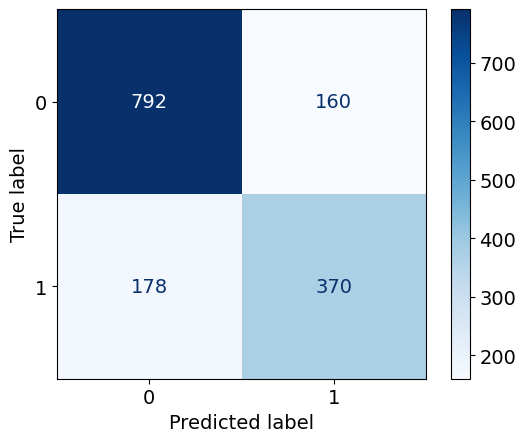

In [15]:
# Display the confusion matrix for 'logreg_model_1' on the validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_estimator(logreg_model_1, X_val, y_val, cmap=plt.cm.Blues);

In [16]:
# Obtain predicted class labels for the validation data using 'logreg_model_1'
y_pred = logreg_model_1.predict(X_val)

In [19]:
# Calculate and print various classification performance measures for 'logreg_model_1'
# Hint: Study the documentations of the different peformance metrics methods
print('Performance measures of this model for the validation set\n')
print('Accuracy = {}'.format(accuracy_score(y_val, y_pred)))
print('Sensitivity = {}'.format(recall_score(y_val, y_pred, pos_label = 1)))
print('Specificity = {}'.format(recall_score(y_val, y_pred, pos_label = 0)))
print('Precision = {}'.format(precision_score(y_val, y_pred)))
print('F1 Score = {}'.format(f1_score(y_val, y_pred)))

Performance measures of this model for the validation set

Accuracy = 0.7746666666666666
Sensitivity = 0.6751824817518248
Specificity = 0.8319327731092437
Precision = 0.6981132075471698
F1 Score = 0.6864564007421151


In [21]:
?logreg_model_1.predict_proba

Signature: logreg_model_1.predict_proba(X)
Docstring:
Probability estimates.

The returned estimates for all classes are ordered by the
label of classes.

For a multi_class problem, if multi_class is set to be "multinomial"
the softmax function is used to find the predicted probability of
each class.
Else use a one-vs-rest approach, i.e calculate the probability
of each class assuming it to be positive using the logistic function.
and normalize these values across all the classes.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Vector to be scored, where `n_samples` is the number of samples and
    `n_features` is the number of features.

Returns
-------
T : array-like of shape (n_samples, n_classes)
    Returns the probability of the sample for each class in the model,
    where classes are ordered as they are in ``self.classes_``.
File:      c:\users\vr3n\codes\upgrad-maryland-analytics\upgrad_venv\lib\site-packages\sklearn\linear_model\_logistic.py
Type:  

In [22]:
# Obtain the predicted probabilities for the class '1' records in the validation data using 'logreg_model_1'
# Hint: The model 'logreg_model_1' has a method called 'predict_proba()'
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains class '1' probabilities
val_probabilities = logreg_model_1.predict_proba(X_val)[:, 1]

# Obtain the values for (1 - specificity) and sensitivity for the validation data using the 'roc_curve' method for 'logreg_model_1'
# Hint: Study the documentation of the 'roc_curve()' method
val_1_spec, val_sens, _ = roc_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\4203161385.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec, y = val_sens, color = 'red', ci = None)


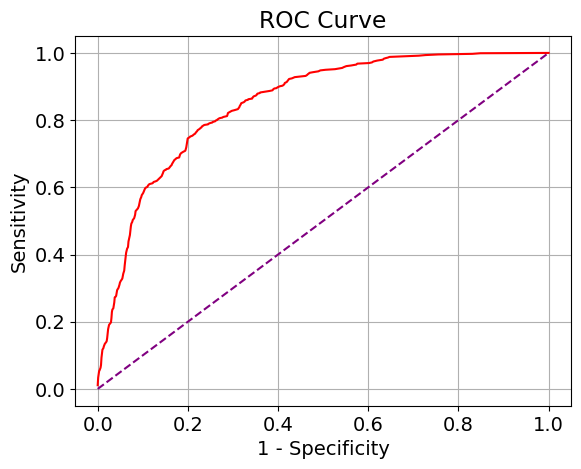

In [24]:
# Plot the ROC curve for 'logreg_model_1' for the validation data
sns.lineplot(x = val_1_spec, y = val_sens, color = 'red', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');
plt.grid()

In [25]:
?roc_auc_score

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
     

In [27]:
# Calculate the ROC AUC score for the validation data for 'logreg_model_1'
# Hint: Study the documentation of the 'roc_auc_score()' method
val_auc = roc_auc_score(y_val, y_pred)
print('ROC AUC for validation data = {}'.format(val_auc))

ROC AUC for validation data = 0.7535576274305342


In [28]:
# Obtain the precision/PPV and recall/sensitivity values for the validation data for 'logreg_model_1'
# Hint: Study the documentation of the 'precision_recall_curve()' method
precision, recall, _ = precision_recall_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1054466000.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = recall, y = precision, color = 'red', ci = None)


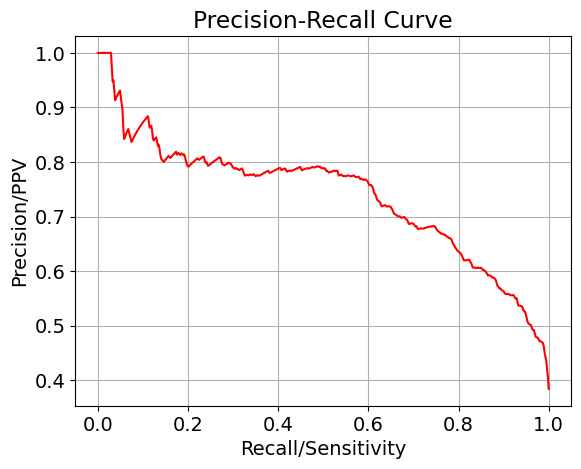

In [30]:
# Plot the precision-recall curve for 'logreg_model_1' for the validation data
sns.lineplot(x = recall, y = precision, color = 'red', ci = None)
plt.xlabel('Recall/Sensitivity')
plt.ylabel('Precision/PPV')
plt.title('Precision-Recall Curve');
plt.grid()

# Task 3 - Logistic Regression Model 2
For this task, you will perform the following steps:
- Build a logistic regression model with Ridge regression
- Visualize the confusion matrix for the model
- Compute various classification performance measures for the model
- Create and visualize the ROC curve for the model
- Create and visualize the precision-recall curve for the model

In [32]:
# Build a logistic regression model with ridge regularization using the 'LogisticRegression()' method
# Hint: The default valule for the 'penalty' parameter is 'l2', so you do not need to change that
# Note: Keep the default value for the 'solver' parameter as well
# Note: Use 'max_iter = 1000'
# Note: Use 'random_state = 0'
logreg_model_2 = LogisticRegression(penalty=None, max_iter=1000, random_state=0)
logreg_model_2 = logreg_model_2.fit(X_train, y_train)

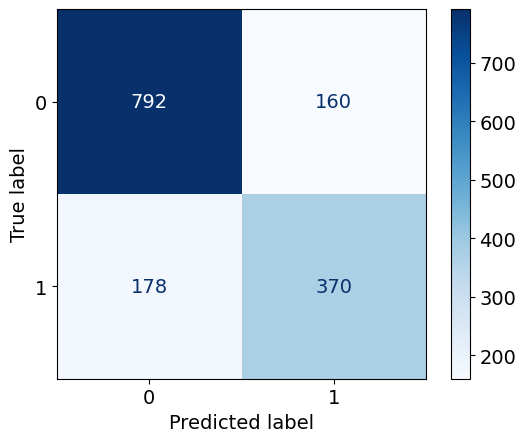

In [33]:
# Display the confusion matrix for 'logreg_model_2' on the validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_estimator(logreg_model_2, X_val, y_val, cmap = plt.cm.Blues);

In [34]:
# Obtain predicted class labels for the validation data using 'logreg_model_2'
y_pred = logreg_model_2.predict(X_val)

In [35]:
# Calculate and print various classification performance measures for 'logreg_model_2' on the validation data
# Hint: Study the documentations of the different peformance metrics methods
print('Performance measures of this model for the validation set\n')
print('Accuracy = {}'.format(accuracy_score(y_val, y_pred)))
print('Sensitivity = {}'.format(recall_score(y_val, y_pred, pos_label = 1)))
print('Specificity = {}'.format(recall_score(y_val, y_pred, pos_label = 0)))
print('Precision = {}'.format(precision_score(y_val, y_pred)))
print('F1 Score = {}'.format(f1_score(y_val, y_pred)))

Performance measures of this model for the validation set

Accuracy = 0.7746666666666666
Sensitivity = 0.6751824817518248
Specificity = 0.8319327731092437
Precision = 0.6981132075471698
F1 Score = 0.6864564007421151


In [36]:
# Obtain the predicted probabilities for the class '1' records in the validation data using 'logreg_model_2'
# Hint: The model 'logreg_model_2' has a method called 'predict_proba()'
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains class '1' probabilities
val_probabilities = logreg_model_2.predict_proba(X_val)[:, 1]

# Obtain the values for (1 - specificity) and sensitivity for the validation data using the 'roc_curve' method for 'logreg_model_2'
# Hint: Study the documentation of the 'roc_curve()' method
val_1_spec, val_sens, _ = roc_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\2361421436.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec, y = val_sens, color = 'blue', ci = None)


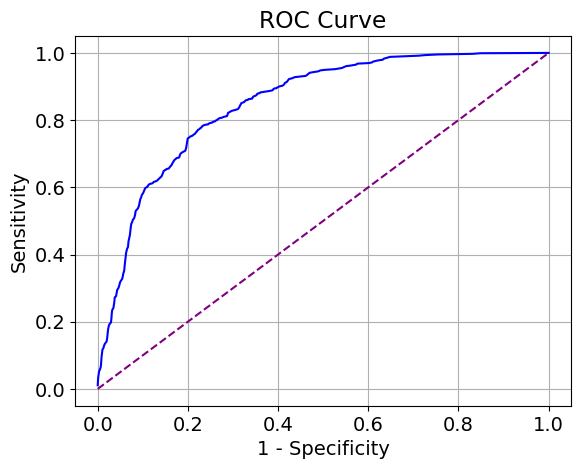

In [38]:
# Plot the ROC curve for 'logreg_model_2' for the validation data
sns.lineplot(x = val_1_spec, y = val_sens, color = 'blue', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');
plt.grid()

In [39]:
# Calculate the ROC AUC score for the validation data for 'logreg_model_2'
# Hint: Study the documentation of the 'roc_auc_score()' method
val_auc = roc_auc_score(y_val, val_probabilities)
print('ROC AUC for validation data = {}'.format(val_auc))

ROC AUC for validation data = 0.8499825568913697


In [40]:
# Obtain the precision/PPV and recall/sensitivity values for the validation data for 'logreg_model_2'
# Hint: Study the documentation of the 'precision_recall_curve()' method
precision, recall, _ = precision_recall_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1261456740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = recall, y = precision, color = 'blue', ci = None)


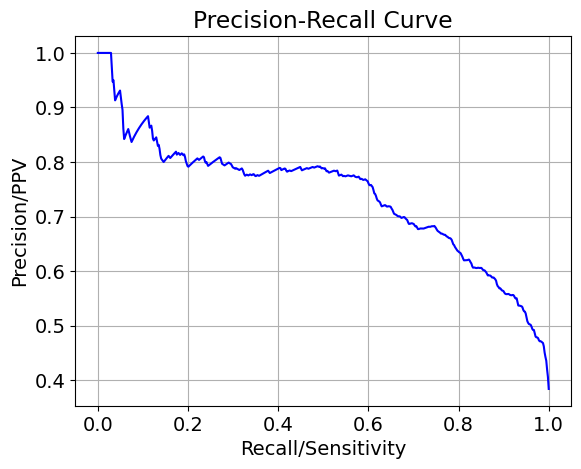

In [42]:
# Plot the precision-recall curve for 'logreg_model_2' for the validation data
sns.lineplot(x = recall, y = precision, color = 'blue', ci = None)
plt.xlabel('Recall/Sensitivity')
plt.ylabel('Precision/PPV')
plt.title('Precision-Recall Curve');
plt.grid()

# Task 4 - Logistic Regression Model 3
For this task, you will perform the following steps:
- Build a logistic regression model with ridge regression and tune the model using the Cs hyperparameter
- Visualize the confusion matrix for the model
- Compute various classification performance measures for the model
- Create and visualize the ROC curve for the model
- Create and visualize the precision-recall curve for the model

In [43]:
# Declare a list of 'C' values to be used for hyperparameter tuning
C_list = np.arange(0.01, 1, 0.01)

In [44]:
# Build a logistic regression model with ridge regularization using the 'LogisticRegressionCV()' method
# Hint: The default valule for the 'penalty' parameter is 'l2', so you do not need to change that
# Note: Keep the default value for the 'solver' parameter
# Note: Keep the default value for the 'cv' parameter
# Note: Use 'max_iter = 1000'
# Note: Use 'random_state = 0'
# Note: Use 'C_list' to tune the model on the 'Cs' parameter
logreg_model_3 = LogisticRegressionCV(max_iter=1000, random_state=0, Cs=C_list)
logreg_model_3 = logreg_model_3.fit(X_train, y_train)

In [45]:
# Check the best 'C' value as a result of the hyperparameter tuning
logreg_model_3.C_

array([0.03])

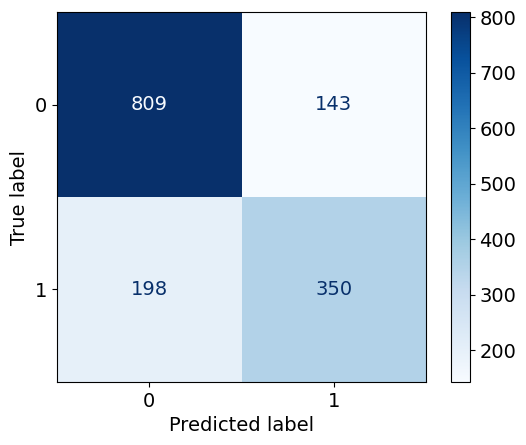

In [46]:
# Display the confusion matrix for 'logreg_model_3' on the validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_estimator(logreg_model_3, X_val, y_val, cmap=plt.cm.Blues);

In [49]:
# Obtain predicted class labels for the validation data using 'logreg_model_3'
y_pred = logreg_model_3.predict(X_val)

In [50]:
# Calculate and print various classification performance measures for 'logreg_model_3' on the validation data
# Hint: Study the documentations of the different peformance metrics methods
print('Performance measures of this model for the validation set\n')
print('Accuracy = {}'.format(accuracy_score(y_val, y_pred)))
print('Sensitivity = {}'.format(recall_score(y_val, y_pred, pos_label= 1)))
print('Specificity = {}'.format(recall_score(y_val, y_pred, pos_label= 0)))
print('Precision = {}'.format(precision_score(y_val, y_pred)))
print('F1 Score = {}'.format(f1_score(y_val, y_pred)))

Performance measures of this model for the validation set

Accuracy = 0.7726666666666666
Sensitivity = 0.6386861313868614
Specificity = 0.8497899159663865
Precision = 0.7099391480730223
F1 Score = 0.6724303554274736


In [51]:
# Obtain the predicted probabilities for the class '1' records in the validation data using 'logreg_model_3'
# Hint: The model 'logreg_model_3' has a method called 'predict_proba()'
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains class '1' probabilities
val_probabilities = logreg_model_3.predict_proba(X_val)[:, 1]

# Obtain the values for (1 - specificity) and sensitivity for the validation data using the 'roc_curve' method for 'logreg_model_3'
# Hint: Study the documentation of the 'roc_curve()' method
val_1_spec, val_sens, _ = roc_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\4129609376.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec, y = val_sens, color = 'green', ci = None)


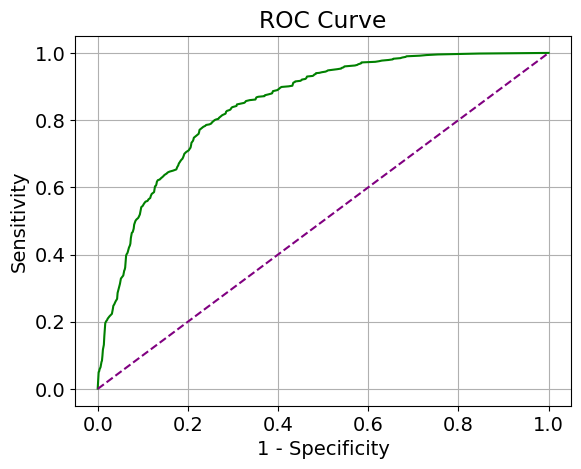

In [53]:
# Plot the ROC curve for 'logreg_model_3' for the validation data
sns.lineplot(x = val_1_spec, y = val_sens, color = 'green', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');
plt.grid()

In [54]:
# Calculate the ROC AUC score for the validation data for 'logreg_model_3'
# Hint: Study the documentation of the 'roc_auc_score()' method
val_auc = roc_auc_score(y_val, val_probabilities)
print('ROC AUC for validation data = {}'.format(val_auc))

ROC AUC for validation data = 0.8450160629945409


In [55]:
# Obtain the precision/PPV and recall/sensitivity values for the validation data for 'logreg_model_3'
# Hint: Study the documentation of the 'precision_recall_curve()' method
precision, recall, _ = precision_recall_curve(y_val, val_probabilities)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1546895989.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = recall, y = precision, color = 'green', ci = None)


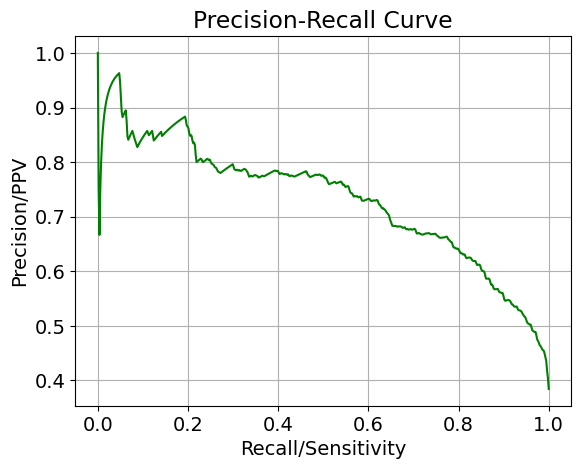

In [57]:
# Plot the precision-recall curve for 'logreg_model_3' for the validation data
sns.lineplot(x = recall, y = precision, color = 'green', ci = None)
plt.xlabel('Recall/Sensitivity')
plt.ylabel('Precision/PPV')
plt.title('Precision-Recall Curve');
plt.grid()

# Task 5 - Misclassification Costs of Best Model
For this task, you will perform the following steps:
- Compare the ROC curves of all three models that you built and select the best one
- Use the logistic regression model that you selected to obtain the predicted probabilities
- Compute the baseline misclassification cost
- Observe how the misclassification cost varies as the cut-off for classification is increased
- Obtain the best misclassification cost and the associated cut-off from the training data
- Compute the potentially best misclassification cost of the model using the validation data

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1215083157.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec_1, y = val_sens_1, color = 'red', label = 'logreg_model_1', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1215083157.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec_2, y = val_sens_2, color = 'blue', label = 'logreg_model_2', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\1215083157.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec_3, y = val_sens_3, color = 'green', label = 'logreg_model_3', ci = None)


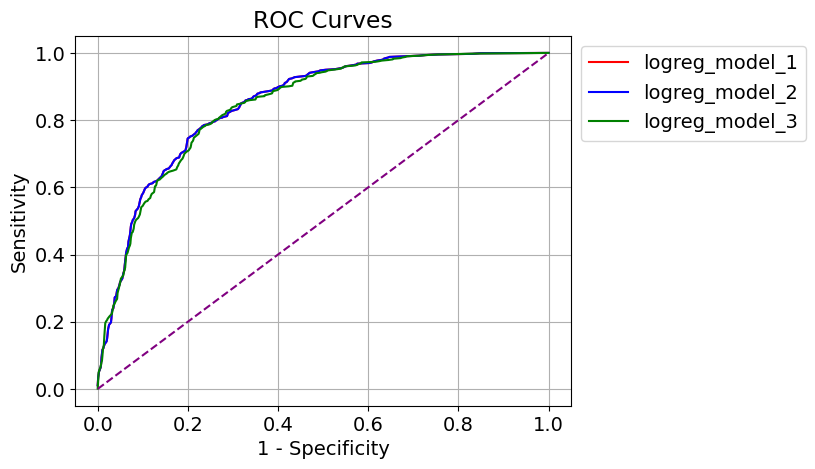

In [61]:
# Obtain the predicted probabilities for the class '1' records in the validation data for all three models
# Hint: Study the documentation of the 'predict_proba()' method
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains class '1' probabilities
val_probabilities_1 = logreg_model_1.predict_proba(X_val)[:, 1]
val_probabilities_2 = logreg_model_2.predict_proba(X_val)[:, 1]
val_probabilities_3 = logreg_model_3.predict_proba(X_val)[:, 1]

# Obtain the values for (1 - specificity) and sensitivity for the validation data using the 'roc_curve' method for all three models
# Hint: Study the documentation of the 'roc_curve()' method
val_1_spec_1, val_sens_1, _ = roc_curve(y_val, val_probabilities_1)
val_1_spec_2, val_sens_2, _ = roc_curve(y_val, val_probabilities_2)
val_1_spec_3, val_sens_3, _ = roc_curve(y_val, val_probabilities_3)

# Plot the ROC curves for all three models for the validation data
sns.lineplot(x = val_1_spec_1, y = val_sens_1, color = 'red', label = 'logreg_model_1', ci = None)
sns.lineplot(x = val_1_spec_2, y = val_sens_2, color = 'blue', label = 'logreg_model_2', ci = None)
sns.lineplot(x = val_1_spec_3, y = val_sens_3, color = 'green', label = 'logreg_model_3', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(bbox_to_anchor = [1, 1]);
plt.grid()

In [62]:
# Note: No single model dominates over the others, so we will look at their ROC AUC scores instead
# Calculate the ROC AUC scores for the validation data for all three models
# Hint: Study the documentation of the 'roc_auc_score()' method
val_auc_1 = roc_auc_score(y_val, val_probabilities_1)
val_auc_2 = roc_auc_score(y_val, val_probabilities_2)
val_auc_3 = roc_auc_score(y_val, val_probabilities_3)

# Print the ROC AUC scores for the three models and choose the model that has the highest value
print('ROC AUC for validation data for logreg_model_1 = {}'.format(val_auc_1))
print('ROC AUC for validation data for logreg_model_2 = {}'.format(val_auc_2))
print('ROC AUC for validation data for logreg_model_3 = {}'.format(val_auc_3))

ROC AUC for validation data for logreg_model_1 = 0.8499825568913697
ROC AUC for validation data for logreg_model_2 = 0.8499825568913697
ROC AUC for validation data for logreg_model_3 = 0.8450160629945409


In [64]:
# Note: We can choose to work with 'logreg_model_1' as it has the highest ROC AUC score
# Obtain the predicted probabilities for the class '1' records in the training and the validation data using 'logreg_model_1'
# Hint: The model 'logreg_model_1' has a method called 'predict_proba()'
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains class '1' probabilities
train_probabilities = logreg_model_1.predict_proba(X_train)
val_probabilities = logreg_model_1.predict_proba(X_val)[:, 1]

In [65]:
# Obtain predicted class labels for the training and the validation data using 'logreg_model_1'
train_y_pred = logreg_model_1.predict(X_train)
val_y_pred = logreg_model_1.predict(X_val)

In [66]:
# Declare the cost of false positives and false negatives
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a 'not churn' customer as 'churn' leads to a few follow up phone calls only, so its cost is less
# Note: Labeling a 'churn' customer as 'not churn' may lead to the loss of that customer, so its cost is more
fp_cost = 50
fn_cost = 100
print('The cost of classifying a person as churn when they are not a churn = {} dollars'.format(fp_cost))
print('The cost of classifying a person as not churn when they are a churn = {} dollars'.format(fn_cost))

The cost of classifying a person as churn when they are not a churn = 50 dollars
The cost of classifying a person as not churn when they are a churn = 100 dollars


In [92]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as a churn or class '1'
# Hint: That means all class '1' people are classified as class '1' accurately
# Hint: The class '0' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class '0', since all of them are labeled as class '1'
# Hint: Recall the formula for the misclassification cost
train_mc_cost_0 = y_train[y_train == 0].count() * fn_cost
val_mc_cost_0 = y_val[y_val == 0].count() * fn_cost

In [93]:
# Print the misclassification cost of classifying everyone as a churn
print('The misclassification cost of classifying everyone in the training data as a churn = {} dollars'.format(train_mc_cost_0))
print('The misclassification cost of classifying everyone in the validation data as a churn = {} dollars'.format(val_mc_cost_0))

The misclassification cost of classifying everyone in the training data as a churn = 217900 dollars
The misclassification cost of classifying everyone in the validation data as a churn = 95200 dollars


In [94]:
# Obtain the confusion matrices for 'logreg_model_1' using the 'confusion_matrix' method for the training and the validation data
# Hint: Study the documentation of the 'confusion_matrix()' method
train_cf = confusion_matrix(y_train, train_y_pred)
val_cf = confusion_matrix(y_val, val_y_pred)

# Obtain the number of false positives and false negatives from the confusion matrices 'train_cf' and 'val_cf'
# Hint: Study the documentation of the 'confusion_matrix()' method
train_fp_count = train_cf[0,1]
train_fn_count = train_cf[1, 0]
val_fp_count = val_cf[0,1]
val_fn_count = val_cf[1, 0]

# Calculate and print the misclassification costs for 'logreg_model_1' for the training and the validation datasets
# Note: This is the misclassification cost of the model 'logreg_model_1' with the default cut-off of 0.5
# Hint: Recall the formula for the misclassification cost
train_mc_cost = train_fp_count * fp_cost + train_fn_count * fn_cost
val_mc_cost = val_fp_count * fp_cost + val_fn_count * fn_cost
print('The misclassification cost on the training data of using the classification model with default cut-off = {} dollars'.format(train_mc_cost))
print('The misclassification cost on the validation data of using the classification model with default cut-off = {} dollars'.format(val_mc_cost))

The misclassification cost on the training data of using the classification model with default cut-off = 64200 dollars
The misclassification cost on the validation data of using the classification model with default cut-off = 25800 dollars


In [95]:
# Generate a list of misclassification costs for various cut-off values for 'logreg_model_1' on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class '1', else it's class '0'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    curr_preds = np.where(train_y_pred > cutoff, 1, 0)
    train_curr_cf = confusion_matrix(y_train, curr_preds)
    train_fp_count = train_curr_cf[0,1]
    train_fn_count = train_curr_cf[1, 0]
    train_mc_cost_current = train_fp_count * fp_cost + train_fn_count * fn_cost
    train_mc_cost.append(train_mc_cost_current)
    
    curr_preds = np.where(val_y_pred > cutoff, 1, 0)
    val_curr_cf = confusion_matrix(y_val, curr_preds)
    val_fp_count = val_curr_cf[0,1]
    val_fn_count = val_curr_cf[1, 0]
    val_mc_cost_current = val_fp_count * fp_cost + val_fn_count * fn_cost
    val_mc_cost.append(val_mc_cost_current)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\326940781.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = cutoffs, y = train_mc_cost, color = 'blue', label = 'Training', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_2248\326940781.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = cutoffs, y = val_mc_cost, color = 'red', label = 'Validation', ci = None)


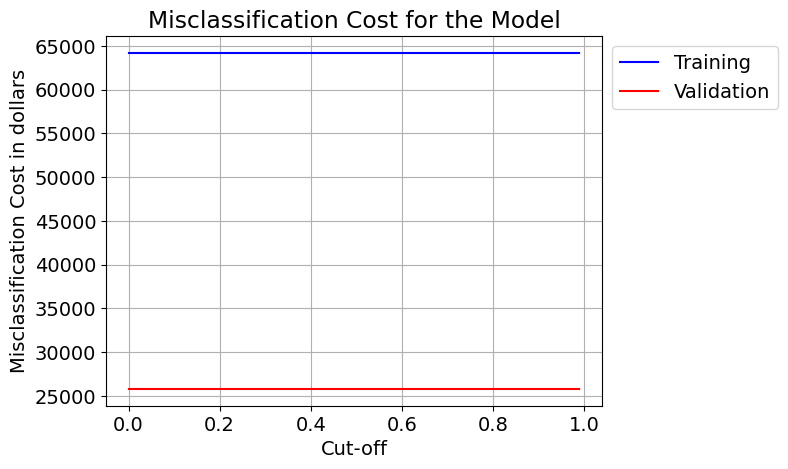

In [96]:
# Plot a graph to show how the misclassification costs vary as the cut-off is increased for the training and the validation data
# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)
sns.lineplot(x = cutoffs, y = train_mc_cost, color = 'blue', label = 'Training', ci = None)
sns.lineplot(x = cutoffs, y = val_mc_cost, color = 'red', label = 'Validation', ci = None)
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost in dollars')
plt.title('Misclassification Cost for the Model')
plt.legend(bbox_to_anchor = [1, 1]);
plt.grid()

In [86]:
# Obtain and print the best misclassification cost for 'logreg_model_1' on the training data
# Hint: The best misclassification cost would be the minimum cost
train_best_cost = min(train_mc_cost)

# Obtain and print the best cut-off cost for 'logreg_model_1' on the training data
# Hint: The best cut-off is the cut-off value for which the misclassification cost is the least
train_best_cutoff = cutoffs[train_mc_cost.index(train_best_cost)]

print('Best classification cut-off probability from the training data for the model = {}'.format(train_best_cutoff))
print('Best misclassification cost on the training data for the model = {} dollars'.format(train_best_cost))

Best classification cut-off probability from the training data for the model = 0.0
Best misclassification cost on the training data for the model = 64200 dollars


In [87]:
# Use the cut-off associated with the best misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
val_best_cost = min(val_mc_cost)

print('Best misclassification cost on the validation data for the model = {} dollars'.format(val_best_cost))

Best misclassification cost on the validation data for the model = 25800 dollars


In [97]:
500 * 12 + 9 * 7500

73500